## Parte 3- Entrenamiento del Modelo



En el Notebook Parte 2 se han analizado practicamente todas las variables que influyen en el grado de calidad del vino, y en este Notebook, dividiremos nuestro dataset en Train y Test, y aplicaremos diferentes modelos de Machine Learning para el entrenamiento. Compararemos los diferentes modelos, y analizaremos los resultados obtenidos. 

In [0]:
# Cargando algunas librerias
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [0]:
# Carga del Dataset winequalityX2.csv desde la Máquina Virtual
wineX3 = pd.read_csv("/home/dsc/Data/wineX3.csv")

# Obtenemos una muestra de 20 registros
wineX3.head(20)

###Pre-procesado de los Datos para aplicar Algoritmos de Machine Learning
#### Definición de variables y división de los datos

In [0]:
# Creamos las variables 'x' e 'y', para ello quitamos 
# las últimas dos columnas 'Calidad' y 'Categoria' del dataset

x = wineX3.iloc[:,1:11]  #'x' serán los features
y = wineX3['Categoria']  #'y' será la variable objetivo (1=Malo, 2=Aceptable, 3=Bueno)

In [0]:
x.head(10)

,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruro,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [0]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    3
8    3
9    2
Name: Categoria, dtype: object

###Característica de escalado ###

Antes de continuar, debemos escalar nuestros datos de modo que cada característica tenga una variación de unidades. La biblioteca de scikit proporciona varios tipos de escaladores, incluidos MinMax Scaler y StandardScaler. A continuación, se utilizará el StandardScaler para escalar los datos.

In [0]:
from sklearn.preprocessing import StandardScaler
xn = wineX3.iloc[:,1:11].values

sc=StandardScaler()
xsc=sc.fit_transform(xn[:,:])

In [0]:
print(xsc)

[[ 0.96187667 -1.39147228 -0.45321841 ...  1.28864292 -0.57920652
  -0.96024611]
 [ 1.96744245 -1.39147228  0.04341614 ... -0.7199333   0.1289504
  -0.58477711]
 [ 1.29706527 -1.18607043 -0.16942723 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-0.09955388 -0.72391627 -0.16942723 ...  0.70550789  0.54204194
   0.54162988]
 [ 0.65462046 -0.77526673 -0.38227061 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.21684919  1.02199944  0.75289408 ...  0.51112954  0.01092425
   0.54162988]]


**Datasets para el Training y el Test**

Se dividen los datos en conjuntos de entrenamiento y validación.


In [0]:
# Dividimos el dataset en 2 partes: 80% para train y 20% para test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xsc, y, test_size = 0.20, random_state = 42)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((1279, 10), (1279,), (320, 10), (320,))

In [0]:
# comprobamos el train y el test  
print(X_test)

[[ 0.17976995 -0.98066858 -0.02753165 ... -0.46076217  0.01092425
  -0.77251161]
 [-0.15541864 -0.51851442 -0.66606179 ...  0.51112954 -1.05131114
  -0.86637886]
 [ 0.79428237 -0.26176211  0.11436394 ... -0.20159105  1.89934271
  -0.49090986]
 ...
 [ 0.40322901 -0.10771073 -0.24037503 ... -1.0438972  -0.75624575
  -0.58477711]
 [-1.44030825  0.61119574 -0.38227061 ... -1.0438972   0.18796348
   0.72936437]
 [ 1.32499765 -1.18607043 -0.66606179 ... -0.13679827 -0.69723268
  -0.67864436]]


In [0]:
print(X_train)

[[ 0.90601191  0.20039205  0.32720732 ...  1.09426457  0.48302886
   1.10483337]
 [-1.77549685  0.66254621 -0.80795737 ... -0.39596939 -0.40216729
   1.38643512]
 [-0.76993107  1.02199944 -0.5241662  ... -0.07200549  0.54204194
  -0.58477711]
 ...
 [ 0.51495855 -1.08336951  0.11436394 ...  1.28864292 -0.69723268
  -0.86637886]
 [-1.83136161  0.4057939  -0.59511399 ...  0.05758008  0.83710732
   1.38643512]
 [-1.32857872 -0.05636026 -0.59511399 ...  0.51112954 -0.69723268
   2.8883111 ]]


In [0]:
# Creamos listas vacías para ir guardando los valores obtenidos
# para las métricas en cada modelo a evaluar a continuación
acc={}
prec={}
rec={}
auroc={}


### **Entrenamiento del Modelo y Predicciones sobre el Test Dataset**

Un dato que debemos considerar es que por sí sola la precisión no es una buena opción a la hora de evaluar un modelo. Esto se debe a que, dado que los datos están sesgados, incluso un algoritmo que clasifica el objetivo como el que pertenece a la clase mayoritaria en todo momento logrará una precisión muy alta. Por lo tanto, en este tipo de situaciones conviene también usar otras métricas como:

    Precision: (verdaderos positivos) / (verdaderos positivos + falsos positivos)
    Recall: (verdaderos positivos) / (verdaderos positivos + falsos negativos)
    Accuracy: el resultado armónico de la precision y el recall
    AUC ROC (Curva ROC): es la gráfica entre la precision y el recall


En esta sección, se han usado diferentes modelos de la biblioteca de scikit y los hemos entrenado en los datos previamente escalados y que luego serán utilizados para cumplir los propósitos de predicción.

Comenzaremos con el modelo '***Support Vector Machine***' (SVM):

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn import metrics

In [0]:
svm = SVC()
svm.fit(X_train,y_train)
predicho_svm =svm.predict(X_test)
print(classification_report(y_test,predicho_svm))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.85      0.98      0.91       262
           3       0.72      0.28      0.40        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.52      0.42      0.44       320
weighted avg       0.80      0.84      0.80       320



In [0]:
svm_cmatrix = confusion_matrix(y_test, predicho_svm)
svm_accuracy = accuracy_score(y_test, predicho_svm)
print(svm_cmatrix)
print(svm_accuracy*100)
acc.update({'Support_Vector_Machine': svm_accuracy*100})

[[  0  11   0]
 [  0 257   5]
 [  0  34  13]]
84.375


***Support Vector Machine* obtiene 84% de Accuracy, y valores altos de Precision y Recall para los grupos de calidad 'Aceptable' y 'Buena'.**

Ahora probaremos el modelo '***Random Forest:***':

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rclf = RandomForestClassifier(n_estimators=200, max_depth=20, oob_score=True)
rclf.fit(X_train, y_train)
predicho_rclf = rclf.predict(X_test)
print(classification_report(y_test, predicho_rclf))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.88      0.96      0.92       262
           3       0.69      0.51      0.59        47

   micro avg       0.86      0.86      0.86       320
   macro avg       0.52      0.49      0.50       320
weighted avg       0.82      0.86      0.84       320



In [0]:
rclf_cmatrix = confusion_matrix(y_test, predicho_rclf)
rclf_accuracy = accuracy_score(y_test, predicho_rclf)
print(rclf_cmatrix)
print(rclf_accuracy*100)
acc.update({'Random_Forest_Classifier': rclf_accuracy*100})

[[  0  11   0]
 [  0 251  11]
 [  0  23  24]]
85.9375


***Random Forest* obtiene 85.9% de Accuracy, y valores altos de Precision y Recall para los grupos de calidad 'Aceptable' y 'Buena'.**

Probaremos a continuación el modelo '***Decision Tree Classifier***':




In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(max_depth=2)
tr2 = tree.fit(X_train,y_train)
predicho_tree = tree.predict(X_test)
print(classification_report(y_test, predicho_tree))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.85      0.96      0.90       262
           3       0.58      0.30      0.39        47

   micro avg       0.83      0.83      0.83       320
   macro avg       0.48      0.42      0.43       320
weighted avg       0.78      0.83      0.80       320



In [0]:
tree_cmatrix = confusion_matrix(y_test, predicho_tree)
tree_accuracy = accuracy_score(y_test, predicho_tree)
print(tree_cmatrix)
print(tree_accuracy*100)
acc.update({'Decision_Tree_Classifier': tree_accuracy*100})

[[  0  11   0]
 [  0 252  10]
 [  0  33  14]]
83.125


***Decision Tree* obtiene 83% de Accuracy, y valores altos de Precision y Recall para el grupo de calidad 'Aceptable'.**

Ahora probaremos el ***'K-Nearest Neighbors' (KNN):***

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
kvecinos = KNeighborsClassifier()
kvecinos.fit(X_train,y_train)
predicho_kvecinos=kvecinos.predict(X_test)
print(classification_report(y_test, predicho_kvecinos))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.87      0.95      0.91       262
           3       0.62      0.43      0.51        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.50      0.46      0.47       320
weighted avg       0.80      0.84      0.82       320



In [0]:
kvecinos_cmatrix = confusion_matrix(y_test, predicho_kvecinos)
kvecinos_accuracy = accuracy_score(y_test, predicho_kvecinos)
print(kvecinos_cmatrix)
print(kvecinos_accuracy*100)
acc.update({'K_Nearest_Neighbors': kvecinos_accuracy*100})

[[  0  11   0]
 [  1 249  12]
 [  0  27  20]]
84.0625


***K-Nearest Neighbors* obtiene 84% de Accuracy, y valores altos de Precision y Recall para el grupo de calidad 'Aceptable'.**

Ahora probaremos con el modelo '***Logistic Regression***':

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
regresion = LogisticRegression()
regresion.fit(X_train, y_train)
predicho_regresion = regresion.predict(X_test)
print(classification_report(y_test, predicho_regresion))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.84      0.97      0.90       262
           3       0.61      0.23      0.34        47

   micro avg       0.83      0.83      0.83       320
   macro avg       0.49      0.40      0.41       320
weighted avg       0.78      0.83      0.79       320



In [0]:
regresion_cmatrix = confusion_matrix(y_test, predicho_regresion)
regresion_accuracy = accuracy_score(y_test, predicho_regresion)
print(regresion_cmatrix)
print(regresion_accuracy*100)
acc.update({'Logistic_Regression': regresion_accuracy*100})

[[  0  11   0]
 [  0 255   7]
 [  0  36  11]]
83.125


***Logistic Regression* obtiene 83% de Accuracy, y valores altos de Precision y Recall para el grupo de calidad 'Aceptable'.**

Ahora probaremos con el modelo '***Stochastic Gradient Decent Classifier (SGDC)***':

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
GD = SGDClassifier(penalty=None)
GD.fit(X_train, y_train)
predicho_GD = GD.predict(X_test)
print(classification_report(y_test, predicho_GD))

              precision    recall  f1-score   support

           1       0.10      0.09      0.10        11
           2       0.87      0.90      0.88       262
           3       0.49      0.40      0.44        47

   micro avg       0.80      0.80      0.80       320
   macro avg       0.48      0.46      0.47       320
weighted avg       0.78      0.80      0.79       320



In [0]:
GD_cmatrix = confusion_matrix(y_test, predicho_GD)
GD_accuracy = accuracy_score(y_test, predicho_GD)
print(GD_cmatrix)
print(GD_accuracy*100)
acc.update({'SGDC': GD_accuracy*100})

[[  1  10   0]
 [  7 235  20]
 [  2  26  19]]
79.6875


***Stochastic Gradient Decent* obtiene 79% de Accuracy, y valores altos de Precision y Recall para el grupo de calidad 'Aceptable'.**

### Comparando los diferentes modelos

In [0]:
evaluacion_modelo = pd.DataFrame()
evaluacion_modelo['Modelo'] = acc.keys() 
evaluacion_modelo['Accuracy'] = acc.values()

result = evaluacion_modelo.sort_values('Accuracy',ascending=False)
result

,Modelo,Accuracy
1,Random_Forest_Classifier,85.9375
0,Support_Vector_Machine,84.3750
3,K_Nearest_Neighbors,84.0625
2,Decision_Tree_Classifier,83.1250
4,Logistic_Regression,83.1250
5,SGDC,79.6875


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

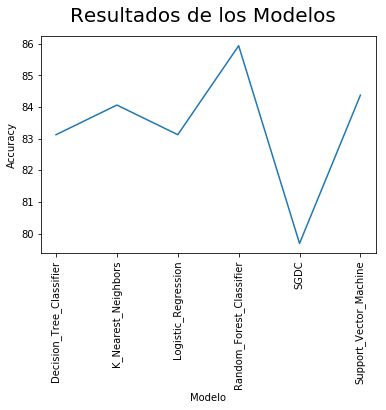

In [0]:
from matplotlib.pyplot import xticks

plt.suptitle("Resultados de los Modelos", fontsize=20)
sns.lineplot(x='Modelo', y='Accuracy',data=result)
xticks(rotation=90)

**Comentarios**: Después de haber analizado diferentes modelos, los mejores resultados obtenidos fueron para el modelo 'Random Forest' con un Accuracy de 85.93%, seguido del modelo SVM con 84.37%. 

Se lograron obtener valores altos de Precision y Recall sobre todo en la categoría de 'Aceptable', pero no así en la categoría de calidad 'Malo' cuyos valores fueron nulos en todos los casos. Entendemos que los modelos fueron capacez de predecir bien en las categorias de 'Aceptable' y 'Bueno', debido a que la cantidad de muestras que era mayor y con lo cual tuvieron un mejor aprendizaje. Debido al escaso número de muestras para la calidad 'Mala', los modelos no lograron aprender lo suficiente. Una opción en este caso pudiera ser tratar de balancear un poco mejor los grupos, con técnicas como SMOTE (lo cual revisaremos en breve).



### Features de Importancia

Hemos visto que para 'Random Forest' los resultados obtenidos han sido mejores comparando con otros modelos; no obstante, intentaremos ajustar los hiperparámetros para el modelo 'Random Forest' y ver si con ello podemos mejorar un poco más los resultados.


In [0]:
rclf.oob_score_

0.8772478498827209

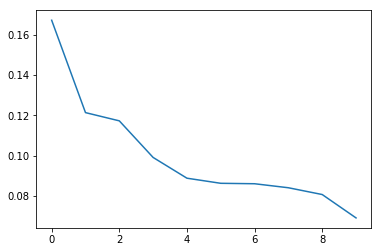

In [0]:
plt.plot(sorted(rclf.feature_importances_,reverse=True))
plt.show()

Como podemos ver en el gráfico de arriba, hay 8 variables principales. Más allá de esto, el modelo se mantiene estable. Veamos cuales son las variables:

In [0]:
print (sorted(zip(map(lambda x: round(x, 4), rclf.feature_importances_), x), reverse=True))

[(0.1672, 'Alcohol'), (0.1214, 'Acidez_Volatil'), (0.1173, 'Sulfatos'), (0.0991, 'Dioxido_Azufre_Total'), (0.0888, 'Acido_Citrico'), (0.0863, 'Densidad'), (0.0861, 'Cloruro'), (0.0841, 'Azucar_Residual'), (0.0807, 'pH'), (0.0691, 'Dioxido_Azufre_Libre')]


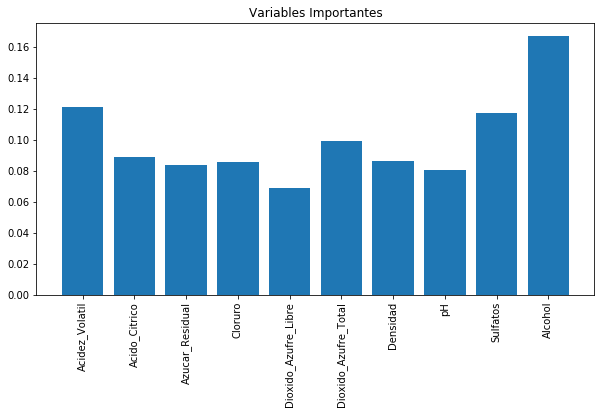

In [0]:
nombres = list(x.columns)
importantes = rclf.feature_importances_

# Graficamos las variables importantes 
plt.figure(figsize=(10,5))
plt.title("Variables Importantes")
y_pos = np.arange(len(nombres))
plt.bar(y_pos, importantes, align='center')
plt.xticks(y_pos, nombres, rotation=90)
plt.show()

**Comentarios**: Las características que contribuyen más a la calidad del vino incluyen el alcohol (el más alto), seguido de la ácidez volátil, los sulfatos, y la densidad. Estos resultados concuerdan con los análisis previos que observamos anteriormente.

De ahora en adelante, usaremos solo estas 8 variables y eliminaremos las variables menos importantes del modelo.

In [0]:
x_newrclf = x[['Acidez_Volatil', 'Acido_Citrico', 'Azucar_Residual', 'Cloruro', 'Dioxido_Azufre_Total', 'Densidad', 'Sulfatos', 'Alcohol']]

In [0]:
# Comprobamos los resultados
x_newrclf.columns

Index(['Acidez_Volatil', 'Acido_Citrico', 'Azucar_Residual', 'Cloruro',
       'Dioxido_Azufre_Total', 'Densidad', 'Sulfatos', 'Alcohol'],
      dtype='object')

Escalamos otra vez (x_newrclf):

In [0]:
from sklearn.preprocessing import StandardScaler
xn2 = x_newrclf.iloc[:,:].values

sc=StandardScaler()
xsc2=sc.fit_transform(xn2[:,:])

Dividimos el dataset otra vez :

In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(xsc2, y, test_size = 0.20, random_state = 42)

Y entrenamos por segunda vez con 'Random Forest' para ver que resultados obtenemos:

In [0]:
rclf2 = RandomForestClassifier(n_estimators=200, max_depth=20, oob_score=True)
rclf2.fit(X_train1, y_train1)
predicho_rclf2 = rclf2.predict(X_test1)
print(classification_report(y_test1, predicho_rclf2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.89      0.96      0.92       262
           3       0.72      0.55      0.63        47

   micro avg       0.87      0.87      0.87       320
   macro avg       0.54      0.51      0.52       320
weighted avg       0.83      0.87      0.85       320



In [0]:
rclf2_cmatrix = confusion_matrix(y_test1, predicho_rclf2)
rclf2_accuracy = accuracy_score(y_test1, predicho_rclf2)
print(rclf2_cmatrix)
print(rclf2_accuracy*100)
acc.update({'Random_Forest_Classifier': rclf2_accuracy*100})

[[  0  11   0]
 [  0 252  10]
 [  0  21  26]]
86.875


**Comentarios**: En nuestro caso los resultados obtenidos con 'Random Forest' (dejando solo las variables de más importancia), han logrado mejorar el resultado de la precisión. Los nuevos valores de precisión y recall han sido ligeramente más altos, así como el accuracy alcanzado de 87.18 %, contra un 85.93 % del ejemplo anterior en el que usabamos todas las variables involucradas. 


Las ventajas de usar la función del 'feature importance' puede ser más notoria en situaciones donde haya un mayor número de variables, y en el que la eliminación de algunas de ellas (no tan significativas) compense con una mejoría, ya sea para comprender la lógica del modelo, o para tener un rendimiento similar o en un tiempo de entrenamiento mucho más corto. En nuestro caso, evidentemente ha habido una mejoría sobre todo en el precision y el accuracy.


### Técnica sobremuestreo (SMOTE)

Como ya hemos visto, para el caso del grado de calidad tenemos un conjunto de datos desbalanceado, con predominio de vinos Aceptables (82.5%) sobre los vinos Buenos (13.6%) y Malos (3.9%).

Para intentar mejorar el rendimiento de nuestros modelos, utilizaremos la técnica de sobremuestreo conocida como SMOTE (Técnica de sobremuestreo de minorías sintéticas) que crea aleatoriamente algunos casos 'sintéticos' de las clases minoritarias para que las observaciones netas de todas clases se equilibren.

Utilizaremos el paquete 'imblearn' para muestrear las clases minoritarias y lo realizaremos sobre el grupo de datos de training y validacion obtenido del punto anterior (es decir, conservando solo las variables más significativas). Luego entrenaremos nuevamente el modelo 'Randon Forest' para observar los cambios.


Dividiremos nuevamente nuestro dataset aplicando SMOTE utilizando el X_train1 y y_train1 del paso anterior:

In [0]:
!pip install imblearn

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')   #Usamos el ratio='minority' para remuestrear la clase minoritaria
X_train_sm, y_train_sm = smote.fit_sample(X_train1, y_train1)
print(X_train_sm.shape, y_train_sm.shape)


(2284, 8) (2284,)


Volvemos a entrenar el modelo obtenido con mejor resultado: Random Forest

In [0]:
rclf3 = RandomForestClassifier(n_estimators=200, max_depth=20, oob_score=True)
rclf3.fit(X_train_sm, y_train_sm)
predicho_rclf3 = rclf3.predict(X_test1)
print(classification_report(y_test1, predicho_rclf3))

              precision    recall  f1-score   support

           1       0.20      0.36      0.26        11
           2       0.89      0.92      0.90       262
           3       0.77      0.51      0.62        47

   micro avg       0.84      0.84      0.84       320
   macro avg       0.62      0.60      0.59       320
weighted avg       0.85      0.84      0.84       320



In [0]:
rclf3_cmatrix = confusion_matrix(y_test1, predicho_rclf3)
rclf3_accuracy = accuracy_score(y_test1, predicho_rclf3)
print(rclf3_cmatrix)
print(rclf3_accuracy*100)
acc.update({'Random_Forest_Classifier': rclf3_accuracy*100})

[[  4   7   0]
 [ 15 240   7]
 [  1  22  24]]
83.75


###Comentario:### 
Como hemos visto aplicando la técnica del sobremuestreo el 'Accuracy' no mejoró (ha sido más bajo que en los dos ejemplos anteriores), no obstante sí se pueden observar como ya se obtienen valores de 'Precision' y de 'Recall' para las predicciones del vino de 'Mala' calidad. El 'Recall' obtenido es alto y la 'Precision' baja.

###Conclusiones:### 
Hemos podido ver que el modelo que alcanzó mayor valores de 'Precision', 'Recall' y 'Accuracy', corresponde al clasificador *'Random Forest*' con un 85% de 'Accuracy'. Adicionalmente vimos que las variables más significativas y fiables que influyen en poder determinar un vino como 'Bueno' corresponden al 'Alcohol', la 'Acidez Volátil', los 'Sulfuros', y la 'Densidad', no obstante se aconseja disponer de un dataset con un mayor número de registros para las calidades de vino más pobres y superiores, a fin de lograr un mayor aprendizaje del modelo y por ende mayor precisión en las predicciones del grupo de calidad pobre. 
La técnica del sobremuestro ha sido útil para confirmar que en los ejemplos anteriores las muestras para la calidad pobre eran insuficientes para que el modelo pudiera tener un buen aprendizaje, no obstante al introducir al dataset muestras ficticias esto no ha mejorado los valores de las métricas para las predicciones (más bien las ha degradado).